# Preparing Time Series from Wide-Form Data

# Task:

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
#import tick customization tools
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
# set random seed
SEED = 321
np.random.seed(SEED)

# Part 1:
- First, you will prepare the dataset for time series analysis:
 - Load in the Zillow Home Value Index dataframe.
   - Note: it is a large file and may take a minute to load.
 - Filter the 4 largest cities into a new dataframe.
   - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
     - Therefore the 4 largest cities would have rank values of [0,1,2,3]
 - Melt the data to long-form and prepare it for time series analysis.
   - Convert the melted dates into datetime datatype.
   - Make the datetime column the index.
 - Resample the dataframe as monthly frequency, grouped by City.

### Load the data

In [2]:
# Load in the zillow data
zillow = pd.read_csv('Data/zillow_home_data.csv')
zillow.info()
zillow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe

In [3]:
large_cities = zillow.loc[:3].copy()
large_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis:

In [4]:
# Display all column names
large_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
# Keep all neccessary rows
melted = pd.melt(large_cities.drop(columns=['RegionID', 'SizeRank']),
                 id_vars=['RegionName', 'RegionType', 'StateName',
                          'State', 'Metro', 'CountyName'],
                           value_name='HomeValue', var_name="Date")
melted

,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...
1087,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


### Convert the melted dates into datetime datatype

In [6]:
# Convert 'Date' column to datetime
melted['Date'] = pd.to_datetime(melted['Date'])
# Confirm results
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   RegionType  1092 non-null   object        
 2   StateName   1092 non-null   object        
 3   State       1092 non-null   object        
 4   Metro       1092 non-null   object        
 5   CountyName  1092 non-null   object        
 6   Date        1092 non-null   datetime64[ns]
 7   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 68.4+ KB


### Make the datetime column the index

In [7]:
melted = melted.set_index("Date")
melted.head(3)

,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,
2000-01-31,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0


## Resample the dataframe as monthly frequency, grouped by City

In [8]:
melted['RegionName'].nunique()

4

In [9]:
zillow_ts = melted.groupby('RegionName').resample("MS").sum()
zillow_ts

RegionName RegionType StateName State  \
RegionName Date                                               
Chicago    2000-01-01    Chicago       city        IL    IL   
           2000-02-01    Chicago       city        IL    IL   
           2000-03-01    Chicago       city        IL    IL   
           2000-04-01    Chicago       city        IL    IL   
           2000-05-01    Chicago       city        IL    IL   
...                          ...        ...       ...   ...   
New York   2022-05-01   New York       city        NY    NY   
           2022-06-01   New York       city        NY    NY   
           2022-07-01   New York       city        NY    NY   
           2022-08-01   New York       city        NY    NY   
           2022-09-01   New York       city        NY    NY   

                                                       Metro     CountyName  \
RegionName Date                                                               
Chicago    2000-01-01     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-02-01     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-03-01     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-04-01     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-05-01     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
...                                                      ...            ...   
New York   2022-05-01  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-06-01  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-07-01  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-08-01  New York-Newark-Jersey City, NY-NJ-PA  Queens County   
           2022-09-01  New York-Newark-Jersey City, NY-NJ-PA  Queens County   

                       HomeValue  
RegionName Date                   
Chicago    2000-01-01   166139.0  
           2000-02-01   166536.0  
           2000-03-01   167368.0  
           2000-04-01   168826.0  
           2000-05-01   170499.0  
...                          ...  
New York   2022-05-01   768797.0  
           2022-06-01   773944.0  
           2022-07-01   777692.0  
           2022-08-01   779960.0  
           2022-09-01   781622.0  

[1092 rows x 7 columns]

In [10]:
# Check index of new df
zillow_ts.head().index

MultiIndex([('Chicago', '2000-01-01'),
            ('Chicago', '2000-02-01'),
            ('Chicago', '2000-03-01'),
            ('Chicago', '2000-04-01'),
            ('Chicago', '2000-05-01')],
           names=['RegionName', 'Date'])

# Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
 - Plot the home values for all 4 cities. (Hint: use unstack)
   - Make sure to add a title and axis labels.
   - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.
     
     
 - Answer the following 2 questions using pandas:
   - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
     - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.
     
   - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
     - Hint: you can use .diff() to calculate the change in values

In [11]:
# Level 0 is 'RegionName'
zillow_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [12]:
# Level 1 is 'Date'
zillow_ts.index.get_level_values(1)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [13]:
# Unstack 'RegionName' index for plotting
unstacked = zillow_ts.unstack(level=0)
unstacked

RegionName                                 RegionType          \
RegionName    Chicago  Houston  Los Angeles  New York    Chicago Houston   
Date                                                                       
2000-01-01    Chicago  Houston  Los Angeles  New York       city    city   
2000-02-01    Chicago  Houston  Los Angeles  New York       city    city   
2000-03-01    Chicago  Houston  Los Angeles  New York       city    city   
2000-04-01    Chicago  Houston  Los Angeles  New York       city    city   
2000-05-01    Chicago  Houston  Los Angeles  New York       city    city   
...               ...      ...          ...       ...        ...     ...   
2022-05-01    Chicago  Houston  Los Angeles  New York       city    city   
2022-06-01    Chicago  Houston  Los Angeles  New York       city    city   
2022-07-01    Chicago  Houston  Los Angeles  New York       city    city   
2022-08-01    Chicago  Houston  Los Angeles  New York       city    city   
2022-09-01    Chicago  Houston  Los Angeles  New York       city    city   

                                StateName          ...  \
RegionName Los Angeles New York   Chicago Houston  ...   
Date                                               ...   
2000-01-01        city     city        IL      TX  ...   
2000-02-01        city     city        IL      TX  ...   
2000-03-01        city     city        IL      TX  ...   
2000-04-01        city     city        IL      TX  ...   
2000-05-01        city     city        IL      TX  ...   
...                ...      ...       ...     ...  ...   
2022-05-01        city     city        IL      TX  ...   
2022-06-01        city     city        IL      TX  ...   
2022-07-01        city     city        IL      TX  ...   
2022-08-01        city     city        IL      TX  ...   
2022-09-01        city     city        IL      TX  ...   

                                         Metro  \
RegionName                         Los Angeles   
Date                                             
2000-01-01  Los Angeles-Long Beach-Anaheim, CA   
2000-02-01  Los Angeles-Long Beach-Anaheim, CA   
2000-03-01  Los Angeles-Long Beach-Anaheim, CA   
2000-04-01  Los Angeles-Long Beach-Anaheim, CA   
2000-05-01  Los Angeles-Long Beach-Anaheim, CA   
...                                        ...   
2022-05-01  Los Angeles-Long Beach-Anaheim, CA   
2022-06-01  Los Angeles-Long Beach-Anaheim, CA   
2022-07-01  Los Angeles-Long Beach-Anaheim, CA   
2022-08-01  Los Angeles-Long Beach-Anaheim, CA   
2022-09-01  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Date                                                                            
2000-01-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-03-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-04-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-05-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
...                                           ...          ...            ...   
2022-05-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-06-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-07-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-08-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2022-09-01  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                              HomeValue                        \
RegionName         Los Angeles       New York   Chicago   Houston Los Angeles   
Date                                                                            
2000-01-01  Los Angeles County  Queens County  166139.

### Create all tick locators and formatters

In [14]:
## Customization Options
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk", font_scale=0.9)

In [15]:
# Function used to plot y-axis values
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

In [16]:
# Create x-axis tick locators and formatters for 
# Create major x-axis ticks
majorx_loc = mdates.YearLocator()
majorx_fmt = mdates.DateFormatter("%Y")
# Create minor ticks x-axis
minorx_loc = mdates.MonthLocator(interval=3)

### Plot the home values for all 4 cities

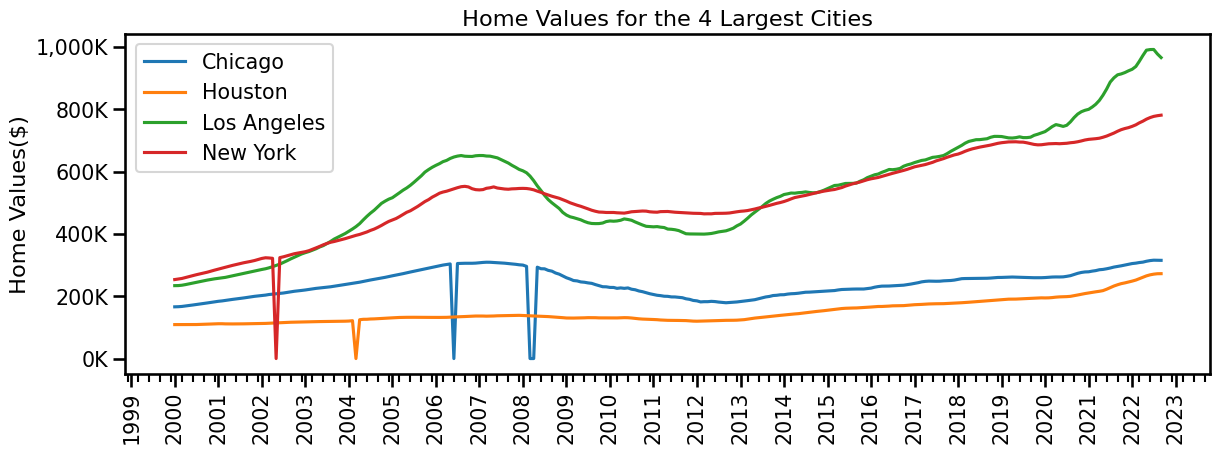

In [17]:
# Plot data
fig, ax=plt.subplots(figsize=(14,5))
ax.plot(unstacked['HomeValue'])
ax.set(title='Home Values for the 4 Largest Cities', ylabel='Home Values($)')

# Customize major x-axis ticks
ax.xaxis.set_major_locator(majorx_loc)
ax.xaxis.set_major_formatter(majorx_fmt)

# Customize minor x-axis tick
ax.xaxis.set_minor_locator(minorx_loc)

# Customize major y-axis tick
ax.yaxis.set_major_formatter(fmt_thous)
ax.legend(unstacked['HomeValue'])
fig.autofmt_xdate(which='major', rotation=90, ha='center');

## Answer the following 2 questions using pandas:

### 1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [18]:
high_value = unstacked['HomeValue'].loc['2008':'2008']
high_value

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-01-01,300207.0,138208.0,603029.0,546538.0
2008-02-01,296063.0,137512.0,596635.0,546098.0
2008-03-01,0.0,136795.0,586065.0,544562.0
2008-04-01,0.0,136628.0,571226.0,541865.0
2008-05-01,293467.0,136228.0,554589.0,537685.0
2008-06-01,288495.0,135773.0,539622.0,533810.0
2008-07-01,288174.0,135392.0,524220.0,529211.0
2008-08-01,283199.0,134770.0,510520.0,525290.0
2008-09-01,280695.0,133932.0,500124.0,521347.0


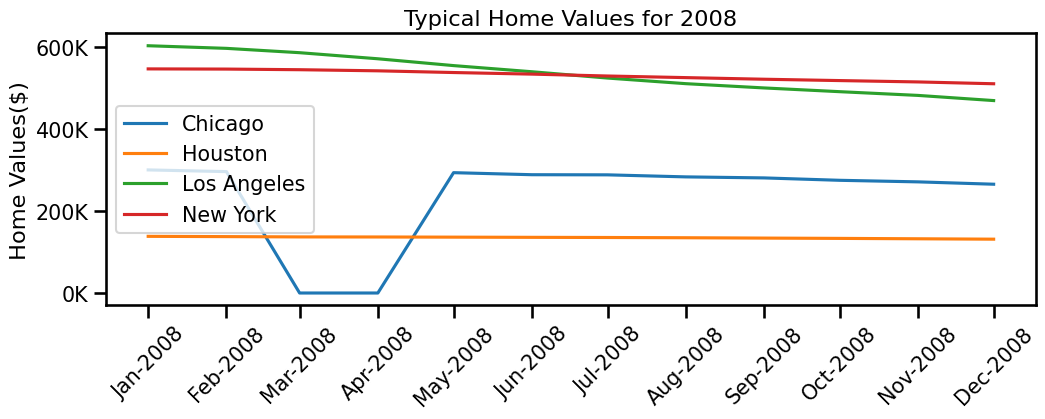

In [19]:
# Plot data for question 1
fig,ax_1 = plt.subplots(figsize=(12,4))
ax_1.plot(high_value)
ax_1.set(title='Typical Home Values for 2008', ylabel='Home Values($)')
# create the locator to place ticks every 3 months.
loc_month = mdates.MonthLocator()
fmt_month = mdates.DateFormatter("%b-%Y")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
# Customize major x-axis ticks
ax_1.xaxis.set_major_locator(loc_month)
ax_1.xaxis.set_major_formatter(fmt_month)
# Customize major y-axis tick
ax_1.yaxis.set_major_formatter(fmt_thous)
# Final Adjustments
ax_1.legend(unstacked['HomeValue'])
fig.autofmt_xdate(which='major', rotation=45, ha='center');

### Answer:
- Based off the plot above, the city with the highest typical home value at the end of 2008 is New York and the lowest is Houston.

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [68]:
# Resample data to daily
zillow_D = melted.groupby('RegionName').resample("D").sum()
zillow_D

RegionName RegionType StateName State  \
RegionName Date                                               
Chicago    2000-01-31    Chicago       city        IL    IL   
           2000-02-01          0          0         0     0   
           2000-02-02          0          0         0     0   
           2000-02-03          0          0         0     0   
           2000-02-04          0          0         0     0   
...                          ...        ...       ...   ...   
New York   2022-09-26          0          0         0     0   
           2022-09-27          0          0         0     0   
           2022-09-28          0          0         0     0   
           2022-09-29          0          0         0     0   
           2022-09-30   New York       city        NY    NY   

                                                       Metro     CountyName  \
RegionName Date                                                               
Chicago    2000-01-31     Chicago-Naperville-Elgin, IL-IN-WI    Cook County   
           2000-02-01                                      0              0   
           2000-02-02                                      0              0   
           2000-02-03                                      0              0   
           2000-02-04                                      0              0   
...                                                      ...            ...   
New York   2022-09-26                                      0              0   
           2022-09-27                                      0              0   
           2022-09-28                                      0              0   
           2022-09-29                                      0              0   
           2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Queens County   

                       HomeValue  
RegionName Date                   
Chicago    2000-01-31   166139.0  
           2000-02-01        0.0  
           2000-02-02        0.0  
           2000-02-03        0.0  
           2000-02-04        0.0  
...                          ...  
New York   2022-09-26        0.0  
           2022-09-27        0.0  
           2022-09-28        0.0  
           2022-09-29        0.0  
           2022-09-30   781622.0  

[33116 rows x 7 columns]

In [71]:
# Unstack 'RegionName' index for plotting
unstacked_D = zillow_D.unstack(level=0)
unstacked_D

RegionName                                 RegionType          \
RegionName    Chicago  Houston  Los Angeles  New York    Chicago Houston   
Date                                                                       
2000-01-31    Chicago  Houston  Los Angeles  New York       city    city   
2000-02-01          0        0            0         0          0       0   
2000-02-02          0        0            0         0          0       0   
2000-02-03          0        0            0         0          0       0   
2000-02-04          0        0            0         0          0       0   
...               ...      ...          ...       ...        ...     ...   
2022-09-26          0        0            0         0          0       0   
2022-09-27          0        0            0         0          0       0   
2022-09-28          0        0            0         0          0       0   
2022-09-29          0        0            0         0          0       0   
2022-09-30    Chicago  Houston  Los Angeles  New York       city    city   

                                StateName          ...  \
RegionName Los Angeles New York   Chicago Houston  ...   
Date                                               ...   
2000-01-31        city     city        IL      TX  ...   
2000-02-01           0        0         0       0  ...   
2000-02-02           0        0         0       0  ...   
2000-02-03           0        0         0       0  ...   
2000-02-04           0        0         0       0  ...   
...                ...      ...       ...     ...  ...   
2022-09-26           0        0         0       0  ...   
2022-09-27           0        0         0       0  ...   
2022-09-28           0        0         0       0  ...   
2022-09-29           0        0         0       0  ...   
2022-09-30        city     city        IL      TX  ...   

                                         Metro  \
RegionName                         Los Angeles   
Date                                             
2000-01-31  Los Angeles-Long Beach-Anaheim, CA   
2000-02-01                                   0   
2000-02-02                                   0   
2000-02-03                                   0   
2000-02-04                                   0   
...                                        ...   
2022-09-26                                   0   
2022-09-27                                   0   
2022-09-28                                   0   
2022-09-29                                   0   
2022-09-30  Los Angeles-Long Beach-Anaheim, CA   

                                                    CountyName                 \
RegionName                               New York      Chicago        Houston   
Date                                                                            
2000-01-31  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   
2000-02-01                                      0            0              0   
2000-02-02                                      0            0              0   
2000-02-03                                      0            0              0   
2000-02-04                                      0            0              0   
...                                           ...          ...            ...   
2022-09-26                                      0            0              0   
2022-09-27                                      0            0              0   
2022-09-28                                      0            0              0   
2022-09-29                                      0            0              0   
2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  Cook County  Harris County   

                                              HomeValue                        \
RegionName         Los Angeles       New York   Chicago   Houston Los Angeles   
Date                                                                            
2000-01-31  Los Angeles County  Queens County  166139.

In [89]:
# Calculate the change of data
change = unstacked_D['HomeValue'].diff()
change

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-01,-166139.0,-109068.0,-234181.0,-253690.0
2000-02-02,0.0,0.0,0.0,0.0
2000-02-03,0.0,0.0,0.0,0.0
2000-02-04,0.0,0.0,0.0,0.0
...,...,...,...,...
2022-09-26,0.0,0.0,0.0,0.0
2022-09-27,0.0,0.0,0.0,0.0
2022-09-28,0.0,0.0,0.0,0.0


In [90]:
# Select specified date for plotting
change_plot = change.loc['11/2008':'12/2008']

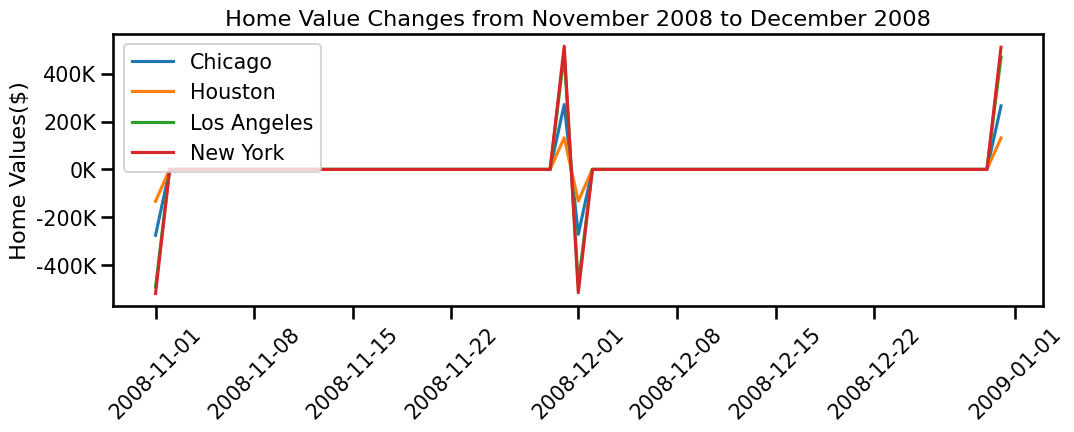

In [91]:
# Plot dat for question 2
fig,ax_2 = plt.subplots(figsize=(12,4))
ax_2.plot(change_plot)
ax_2.set(title='Home Value Changes from November 2008 to December 2008', ylabel='Home Values($)')

# create auto locator
locator = mdates.AutoDateLocator()
fmt_month = mdates.AutoDateFormatter(locator)

# Customize major y-axis tick
ax_2.yaxis.set_major_formatter(fmt_thous)

# Final Adjustments
ax_2.legend(unstacked['HomeValue'])
fig.autofmt_xdate(which='major', rotation=45, ha='center');